In [19]:
#%pip install vaderSentiment
import pandas as pd
from sklearn.linear_model import LinearRegression
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.impute import KNNImputer
import math 
import random as rnd

In [2]:
businessdatareader = pd.read_json('yelp_dataset~/yelp_academic_dataset_business.json',lines=True,chunksize=50000)
for business in businessdatareader:
    dfb = business
    break

In [4]:
tipdatareader = pd.read_json('yelp_dataset~/yelp_academic_dataset_tip.json',lines = True,chunksize = 200000)
for chunk in tipdatareader:
    dftip = chunk
    break

In [5]:
userdatareader = pd.read_json('yelp_dataset~/yelp_academic_dataset_user.json',lines = True,chunksize = 100000)
for chunk in userdatareader:
    dfuser = chunk
    break


In [6]:
reviewdatareader = pd.read_json('yelp_dataset~/yelp_academic_dataset_review.json',lines = True,chunksize = 200000)

for chunk in reviewdatareader:
    dfr = chunk
    break

In [7]:
# Buisness Data
dfb.head(50)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."
5,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,Vancouver,BC,V5V,49.251342,-123.101333,3.5,169,1,"{'GoodForKids': 'True', 'Alcohol': 'u'none'', ...","Restaurants, Thai","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'..."
6,t35jsh9YnMtttm69UCp7gw,Escott Orthodontics,2511 Edgewater Dr,Orlando,FL,32804,28.573998,-81.389284,4.5,7,1,"{'AcceptsInsurance': 'True', 'BusinessAcceptsC...","Dentists, Health & Medical, Orthodontists","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:30', ..."
7,jFYIsSb7r1QeESVUnXPHBw,Boxwood Biscuit,740 S High St,Columbus,OH,43206,39.947007,-82.997471,4.5,11,1,None,"Breakfast & Brunch, Restaurants","{'Saturday': '8:0-14:0', 'Sunday': '8:0-14:0'}"
8,N3_Gs3DnX4k9SgpwJxdEfw,Lane Wells Jewelry Repair,"7801 N Lamar Blvd, Ste A140",Austin,TX,78752,30.346169,-97.711458,5.0,30,1,"{'RestaurantsPriceRange2': '1', 'ByAppointment...","Shopping, Jewelry Repair, Appraisal Services, ...","{'Monday': '12:15-17:0', 'Tuesday': '12:15-17:..."
9,tXvdYGvlEceDljN8gt2_3Q,Capital City Barber Shop,"615 W Slaughter Ln, Ste 113",Austin,TX,78748,30.172706,-97.799920,4.0,5,0,"{'BusinessAcceptsCreditCards': 'False', 'Resta...","Barbers, Beauty & Spas","{'Monday': '9:0-17:0', 'Tuesday': '9:0-19:0', ..."


In [8]:
# Taking only restaurants from the yelp dataset

substring = "Restaurant"

for index,row in dfb.iterrows():
    if(row['categories'] is not None):
        if(substring not in row['categories']):
            dfb.drop(index,inplace = True)

In [10]:
print(len(dfb))

15798


In [11]:
# Users dataframe
dfuser.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,q_QQ5kBBwlCcbL1s4NVK3g,Jane,1220,2005-03-14 20:26:35,15038,10030,11291,"2006,2007,2008,2009,2010,2011,2012,2013,2014","xBDpTUbai0DXrvxCe3X16Q, 7GPNBO496aecrjJfW6UWtg...",1357,...,163,190,361,147,1212,5691,2541,2541,815,323
1,dIIKEfOgo0KqUfGQvGikPg,Gabi,2136,2007-08-10 19:01:51,21272,10289,18046,"2007,2008,2009,2010,2011,2012,2013,2014,2015,2...","XPzYf9_mwG2eXYP2BAGSTA, 2LooM5dcIk2o01nftYdPIg...",1025,...,87,94,232,96,1187,3293,2205,2205,472,294
2,D6ErcUnFALnCQN4b1W_TlA,Jason,119,2007-02-07 15:47:53,188,128,130,"2010,2011","GfB6sC4NJQvSI2ewbQrDNA, jhZtzZNNZJOU2YSZ6jPlXQ...",16,...,1,3,0,0,5,20,31,31,3,1
3,JnPIjvC0cmooNDfsa9BmXg,Kat,987,2009-02-09 16:14:29,7234,4722,4035,"2009,2010,2011,2012,2013,2014","HQZPQhKMwRAyS6BCselVWQ, kP2U1s_sjQfHO9grxiyDTA...",420,...,129,93,219,90,1120,4510,1566,1566,391,326
4,37Hc8hr3cw0iHLoPzLK6Ow,Christine,495,2008-03-03 04:57:05,1577,727,1124,"2009,2010,2011","-Q88pZUcrfN0BLBDp-bkAQ, etPn4Pv1Gc4cRZjRgB_BOw...",47,...,19,32,16,15,77,131,310,310,98,44


In [12]:
# Review Data Frame
dfr.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01


In [13]:
dfuser.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,q_QQ5kBBwlCcbL1s4NVK3g,Jane,1220,2005-03-14 20:26:35,15038,10030,11291,"2006,2007,2008,2009,2010,2011,2012,2013,2014","xBDpTUbai0DXrvxCe3X16Q, 7GPNBO496aecrjJfW6UWtg...",1357,...,163,190,361,147,1212,5691,2541,2541,815,323
1,dIIKEfOgo0KqUfGQvGikPg,Gabi,2136,2007-08-10 19:01:51,21272,10289,18046,"2007,2008,2009,2010,2011,2012,2013,2014,2015,2...","XPzYf9_mwG2eXYP2BAGSTA, 2LooM5dcIk2o01nftYdPIg...",1025,...,87,94,232,96,1187,3293,2205,2205,472,294
2,D6ErcUnFALnCQN4b1W_TlA,Jason,119,2007-02-07 15:47:53,188,128,130,"2010,2011","GfB6sC4NJQvSI2ewbQrDNA, jhZtzZNNZJOU2YSZ6jPlXQ...",16,...,1,3,0,0,5,20,31,31,3,1
3,JnPIjvC0cmooNDfsa9BmXg,Kat,987,2009-02-09 16:14:29,7234,4722,4035,"2009,2010,2011,2012,2013,2014","HQZPQhKMwRAyS6BCselVWQ, kP2U1s_sjQfHO9grxiyDTA...",420,...,129,93,219,90,1120,4510,1566,1566,391,326
4,37Hc8hr3cw0iHLoPzLK6Ow,Christine,495,2008-03-03 04:57:05,1577,727,1124,"2009,2010,2011","-Q88pZUcrfN0BLBDp-bkAQ, etPn4Pv1Gc4cRZjRgB_BOw...",47,...,19,32,16,15,77,131,310,310,98,44


In [14]:
# Buisness dataframe pre processing
# Inserting the GoodForKids column while is extracted from the attributes column
dfb.insert(14,"GoodForKids",0)


In [15]:
# Dropping all rows which dont have attributes
dfb =dfb.dropna(subset=['attributes'])

In [16]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15613 entries, 0 to 49997
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   15613 non-null  object 
 1   name          15613 non-null  object 
 2   address       15613 non-null  object 
 3   city          15613 non-null  object 
 4   state         15613 non-null  object 
 5   postal_code   15613 non-null  object 
 6   latitude      15613 non-null  float64
 7   longitude     15613 non-null  float64
 8   stars         15613 non-null  float64
 9   review_count  15613 non-null  int64  
 10  is_open       15613 non-null  int64  
 11  attributes    15613 non-null  object 
 12  categories    15612 non-null  object 
 13  hours         13177 non-null  object 
 14  GoodForKids   15613 non-null  int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 1.9+ MB


In [17]:
dfb["stars"].value_counts()

4.0    4122
3.5    3776
3.0    2562
4.5    2196
2.5    1368
2.0     773
5.0     451
1.5     304
1.0      61
Name: stars, dtype: int64

In [18]:
del dfb['hours']

In [20]:
dfb =dfb.dropna(subset=['categories'])

## 1. GoodforKids

In [22]:
# Finding out if restaurants is good for kids from the attributes tab
for i in range(len(dfb)):
        if dfb['attributes'].iloc[i] is not None and dfb['attributes'].iloc[i].get('GoodForKids') != 'None'and dfb['attributes'].iloc[i].get('GoodForKids')!=None and dfb['attributes'].iloc[i].get('GoodForKids') != "u'None'":
            if dfb['attributes'].iloc[i].get('GoodForKids') == "True":
                dfb['GoodForKids'].iloc[i] =1
            else:
                dfb['GoodForKids'].iloc[i] =0
        else:
            if "Bars" in dfb['categories'].iloc[i]:
                dfb['GoodForKids'].iloc[i] = 0
            else:
                dfb['GoodForKids'].iloc[i] = None


c:\users\sri\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [23]:
dfb.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,GoodForKids
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...",1.0
5,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,Vancouver,BC,V5V,49.251342,-123.101333,3.5,169,1,"{'GoodForKids': 'True', 'Alcohol': 'u'none'', ...","Restaurants, Thai",1.0
12,HPA_qyMEddpAEtFof02ixg,Mr G's Pizza & Subs,474 Lowell St,Peabody,MA,01960,42.541155,-70.973438,4.0,39,1,"{'RestaurantsGoodForGroups': 'True', 'HasTV': ...","Food, Pizza, Restaurants",1.0
13,ufCxltuh56FF4-ZFZ6cVhg,Sister Honey's,247 E Michigan St,Orlando,FL,32806,28.513265,-81.374707,4.5,135,1,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, American (New), Bakeries, Dessert...",NaN


In [24]:
imputergk = KNNImputer(n_neighbors=2)
GoodForKids = imputergk.fit_transform(dfb['GoodForKids'].values.reshape(-1,1))

In [25]:
for i in range(len(dfb)):
    dfb['GoodForKids'].iloc[i]=math.ceil(GoodForKids[i][0])

In [26]:
dfb.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,GoodForKids
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...",1.0
5,D4JtQNTI4X3KcbzacDJsMw,Bob Likes Thai Food,3755 Main St,Vancouver,BC,V5V,49.251342,-123.101333,3.5,169,1,"{'GoodForKids': 'True', 'Alcohol': 'u'none'', ...","Restaurants, Thai",1.0
12,HPA_qyMEddpAEtFof02ixg,Mr G's Pizza & Subs,474 Lowell St,Peabody,MA,01960,42.541155,-70.973438,4.0,39,1,"{'RestaurantsGoodForGroups': 'True', 'HasTV': ...","Food, Pizza, Restaurants",1.0
13,ufCxltuh56FF4-ZFZ6cVhg,Sister Honey's,247 E Michigan St,Orlando,FL,32806,28.513265,-81.374707,4.5,135,1,"{'BusinessParking': '{'garage': False, 'street...","Restaurants, American (New), Bakeries, Dessert...",1.0


<AxesSubplot:>

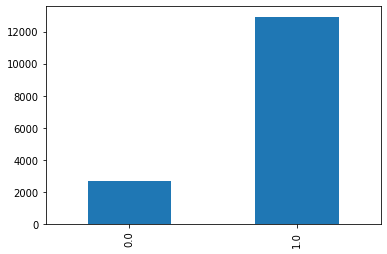

In [27]:
# dfb['GoodForKids'].value_counts().plot(kind = 'bar')
dfb['GoodForKids'].value_counts().sort_values().plot(kind = 'bar')

## 2. Alcohol

In [29]:
# Extracting if alcohol is served from the attributes tab
dfb.insert(14,"Alcohol",0)

In [42]:
for i in range(len(dfb)):
    if dfb['attributes'].iloc[i].get('Alcohol') != None:
        if dfb['attributes'].iloc[i].get('Alcohol') != "'none'" and dfb['attributes'].iloc[i].get('Alcohol') != "u'none'":
            dfb['Alcohol'].iloc[i] = 1
        else:
            dfb['Alcohol'].iloc[i] = 0
    else:
        dfb['Alcohol'].iloc[i] = None
        

In [43]:
# Using Knn imputer to fill out missing values
imputer = KNNImputer(n_neighbors=10)
alco = imputer.fit_transform(dfb['Alcohol'].values.reshape(-1,1))

In [44]:
for i in range(len(dfb)):
    dfb['Alcohol'].iloc[i]= round(alco[i][0])

<AxesSubplot:>

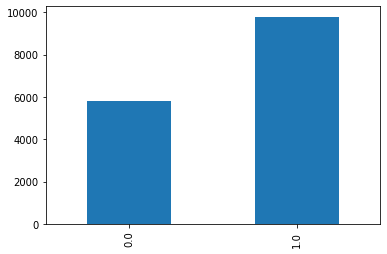

In [45]:
dfb['Alcohol'].value_counts().sort_values().plot(kind = 'bar')

In [46]:
dfb['Alcohol'].unique()

array([1., 0.])

## 3. Wifi

In [47]:
# Extracting if WiFi is available from the attributes tab
dfb.insert(15,"WiFi",0)

In [48]:
for i in range(len(dfb)):
    if dfb['attributes'].iloc[i].get('WiFi') !=None:
        if(dfb['attributes'].iloc[i].get('WiFi') !="u'no'" and dfb['attributes'].iloc[i].get('WiFi') !="'no'"):
            dfb['WiFi'].iloc[i] = 1
        else:
            dfb['WiFi'].iloc[i] = 0
    else:
        dfb['WiFi'].iloc[i] = None
   
    

c:\users\sri\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [49]:
imputer1 = KNNImputer(n_neighbors=10)
wifi = imputer1.fit_transform(dfb['WiFi'].values.reshape(-1,1))
for i in range(len(dfb)):
    dfb['WiFi'].iloc[i]= round(wifi[i][0])

<AxesSubplot:>

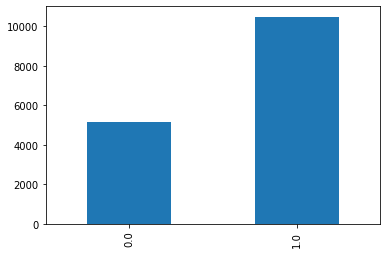

In [50]:
dfb['WiFi'].value_counts().sort_values().plot(kind = 'bar')

## 4. BusinessAccepts Credit Cards

In [51]:
# Extracting if BusinessAcceptsCreditCards is available from the attributes tab
dfb.insert(16,"BusinessAcceptsCreditCards",0)

In [52]:
for i in range(len(dfb)):
    if(dfb['attributes'].iloc[i].get('BusinessAcceptsCreditCards') != None):
        if(dfb['attributes'].iloc[i].get('BusinessAcceptsCreditCards') =='True'):
            dfb['BusinessAcceptsCreditCards'].iloc[i] = 1
        else:
            dfb['BusinessAcceptsCreditCards'].iloc[i] = 0
    else:
        dfb['BusinessAcceptsCreditCards'].iloc[i] = None
        

c:\users\sri\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [53]:
imputer2 = KNNImputer(n_neighbors=10)
cc = imputer2.fit_transform(dfb['BusinessAcceptsCreditCards'].values.reshape(-1,1))
for i in range(len(dfb)):
    dfb['BusinessAcceptsCreditCards'].iloc[i]= round(cc[i][0])

<AxesSubplot:>

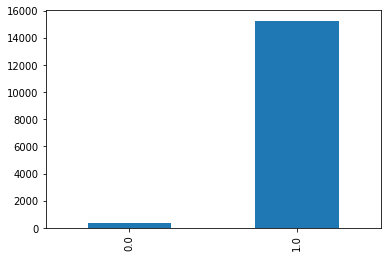

In [54]:
dfb['BusinessAcceptsCreditCards'].value_counts().sort_values().plot(kind = 'bar')

In [55]:
dfb['BusinessAcceptsCreditCards'].value_counts()

1.0    15240
0.0      372
Name: BusinessAcceptsCreditCards, dtype: int64

## 5. Rest_Price_range

In [56]:
# Extracting Restaurant_Price_Range attributes tab
dfb.insert(17,"Restaurant_Price_Range",0)

In [57]:
for i in range(len(dfb)):
    if dfb['attributes'].iloc[i].get('RestaurantsPriceRange2') is not None and dfb['attributes'].iloc[i].get('RestaurantsPriceRange2') !='None':
        dfb['Restaurant_Price_Range'].iloc[i] = dfb['attributes'].iloc[i].get('RestaurantsPriceRange2')
    else:
        dfb['Restaurant_Price_Range'].iloc[i] = None


In [58]:
dfb['Restaurant_Price_Range'].value_counts()

2    6959
1    6294
3     560
4      75
Name: Restaurant_Price_Range, dtype: int64

In [59]:
# Filling null values with Knn Imputer
imputer3 = KNNImputer(n_neighbors=10)

In [60]:
PriceRange = imputer3.fit_transform(dfb['Restaurant_Price_Range'].values.reshape(-1,1))

In [61]:
for i in range(len(dfb)):
    dfb['Restaurant_Price_Range'].iloc[i]=math.ceil(PriceRange[i][0])

<AxesSubplot:>

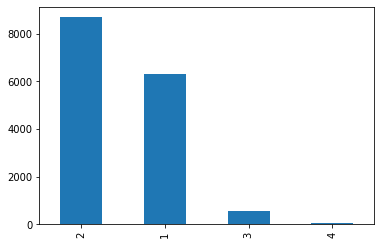

In [62]:
dfb['Restaurant_Price_Range'].value_counts().plot(kind = 'bar')

## 6. Bike Parking

In [63]:
dfb.insert(18,"BikeParking",0)

In [64]:
# Extracting if Bike parking is present from the attributes tab
for i in range(len(dfb)):
    if(dfb['attributes'].iloc[i].get('BikeParking') !=None):
        if(dfb['attributes'].iloc[i].get('BikeParking') == 'True'):
            dfb['BikeParking'].iloc[i]=1
        else:
            dfb['BikeParking'].iloc[i]=0
    else:
        dfb['BikeParking'].iloc[i] =None
        
        

c:\users\sri\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [65]:
imputer4 = KNNImputer(n_neighbors=10)
bike = imputer4.fit_transform(dfb['BikeParking'].values.reshape(-1,1))
for i in range(len(dfb)):
    dfb['BikeParking'].iloc[i]= round(bike[i][0])

<AxesSubplot:>

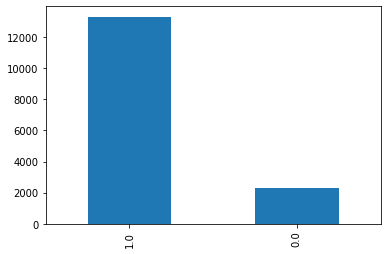

In [66]:
dfb['BikeParking'].value_counts().plot(kind = 'bar')

## 7. Review Sentiment

In [67]:
# Pre processing Review DataFrame
dfr.insert(8,"Review_Sentiment",0)

In [68]:
# Getting the review sentiment from the text in reviews tab
analyzer =SentimentIntensityAnalyzer()

In [69]:
for i in range(len(dfr)):
    if(dfr['text'].iloc[i]!=None):
        vs = analyzer.polarity_scores(dfr['text'].iloc[i])
        dfr['Review_Sentiment'].iloc[i] = vs['compound']

c:\users\sri\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [70]:
dfr.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,Review_Sentiment,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,3,1,1,Apparently Prides Osteria had a rough summer a...,0.9950,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4,1,0,0,This store is pretty good. Not as great as Wal...,0.9966,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5,0,0,0,I called WVM on the recommendation of a couple...,0.9705,2013-05-28 20:38:06
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2,1,1,1,I've stayed at many Marriott and Renaissance M...,-0.4386,2010-01-08 02:29:15
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4,0,0,0,The food is always great here. The service fro...,0.9359,2011-07-28 18:05:01


In [71]:
dfr.isna().sum()

review_id           0
user_id             0
business_id         0
stars               0
useful              0
funny               0
cool                0
text                0
Review_Sentiment    0
date                0
dtype: int64

In [72]:
review_sentiment = dfr.groupby('business_id')['Review_Sentiment'].mean()

In [73]:
# Calculating average review sentiment of each restaurant
dfr['average_review_sentiment'] = 0
for i in range(len(dfr)):
    dfr['average_review_sentiment'].iloc[i] = review_sentiment.loc[dfr.iloc[i].business_id]

c:\users\sri\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [74]:
dfr.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,Review_Sentiment,date,average_review_sentiment
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,3,1,1,Apparently Prides Osteria had a rough summer a...,0.9950,2014-10-11 03:34:02,0.799430
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4,1,0,0,This store is pretty good. Not as great as Wal...,0.9966,2015-07-03 20:38:25,0.632139
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5,0,0,0,I called WVM on the recommendation of a couple...,0.9705,2013-05-28 20:38:06,0.852437
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2,1,1,1,I've stayed at many Marriott and Renaissance M...,-0.4386,2010-01-08 02:29:15,0.648729
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4,0,0,0,The food is always great here. The service fro...,0.9359,2011-07-28 18:05:01,0.819440


## 8. Review Length

In [75]:
dfr.insert(11,"Review_Length",0)

In [76]:
# Calculating average review length
for i in range(len(dfr)):
    if dfr['text'] is not None:
        dfr['Review_Length'].iloc[i] = len(dfr['text'].iloc[i])

c:\users\sri\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [77]:
dfr.insert(12,"Average_Review_Length",0)

In [78]:
AverageReviewLength = dfr.groupby('business_id')['Review_Length'].mean()

In [79]:
for i in range(len(dfr)):
    dfr['Average_Review_Length'].iloc[i] = math.trunc(AverageReviewLength.loc[dfr.iloc[i].business_id])

In [80]:
# Calculating total funny cool and useful votes
dfr.insert(13,"total_cool_votes",0)
dfr.insert(14,"total_useful_votes",0)
dfr.insert(15,"total_funny_votes",0)

In [81]:
coolvotes = dfr.groupby('business_id')['cool'].sum()
funnyvotes = dfr.groupby('business_id')['funny'].sum()
useful = dfr.groupby('business_id')['useful'].sum()

In [82]:
for i in range(len(dfr)):
    dfr['total_cool_votes'].iloc[i] = coolvotes.loc[dfr.iloc[i].business_id]
    dfr['total_useful_votes'].iloc[i] = useful.loc[dfr.iloc[i].business_id]
    dfr['total_funny_votes'].iloc[i] = funnyvotes.loc[dfr.iloc[i].business_id]
    

## 9. Tip sentiment

In [83]:
# Tip DataFrame Preprocessing
dftip.insert(5,"tip_sentiment",0)

In [84]:
# Calculating tip sentiment
for i in range(len(dftip)):
    if(dftip['text'].iloc[i]!=None):
        vs = analyzer.polarity_scores(dftip['text'].iloc[i])
        dftip['tip_sentiment'].iloc[i] = vs['compound']

In [85]:
avgTipSentiment =dftip.groupby('business_id')['tip_sentiment'].mean()

In [86]:
dftip.insert(6,"average_tip_sentiment",0)

In [87]:
for i in range(len(dftip)):
    dftip['average_tip_sentiment'].iloc[i] = round(avgTipSentiment.loc[dftip.iloc[i].business_id],4)

In [88]:
# Deleting unwanted columns in Buisness dataframe
dfb.drop(['latitude','longitude','postal_code','address'],inplace =True,axis=1)

In [89]:
dfb.drop(['city','state'],inplace =True,axis=1)

In [92]:
dfuser.drop(["name","useful","funny","cool"],inplace = True,axis =1)

In [93]:
dfr.drop(["useful","funny","cool"],inplace =True,axis=1)

In [94]:
dfr.drop("date",inplace=True,axis = 1)

In [95]:
dfr.head()

,review_id,user_id,business_id,stars,text,Review_Sentiment,average_review_sentiment,Review_Length,Average_Review_Length,total_cool_votes,total_useful_votes,total_funny_votes
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4,Apparently Prides Osteria had a rough summer a...,0.9950,0.799430,1856,767,7,58,22
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4,This store is pretty good. Not as great as Wal...,0.9966,0.632139,701,703,5,16,3
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5,I called WVM on the recommendation of a couple...,0.9705,0.852437,578,699,6,69,6
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2,I've stayed at many Marriott and Renaissance M...,-0.4386,0.648729,390,891,21,65,23
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4,The food is always great here. The service fro...,0.9359,0.819440,181,521,50,124,36


In [98]:
print(len(dfr))

200000


## 10. Merge

In [137]:
# Merging all the dataFrames
dfFinal=pd.merge(dfb,dfr,how="left",on ="business_id",indicator=True)

In [138]:
bool_series = pd.isnull(dfFinal["user_id"])

In [139]:
# dfFinal[bool_series]

In [140]:
dfFinal["stars_x"].value_counts()

4.0    61107
3.5    37180
4.5    21570
3.0    19234
2.5     7087
2.0     2189
5.0      915
1.5      760
1.0       84
Name: stars_x, dtype: int64

In [143]:
# dfFinal.info()

In [144]:
dfFinal.isna().sum()

business_id                       0
name                              0
stars_x                           0
review_count                      0
is_open                           0
attributes                        0
categories                        0
GoodForKids                       0
Alcohol                           0
WiFi                              0
BusinessAcceptsCreditCards        0
Restaurant_Price_Range            0
BikeParking                       0
review_id                     11138
user_id                       11138
stars_y                       11138
text                          11138
Review_Sentiment              11138
average_review_sentiment      11138
Review_Length                 11138
Average_Review_Length         11138
total_cool_votes              11138
total_useful_votes            11138
total_funny_votes             11138
_merge                            0
dtype: int64

In [145]:
dfFinal.drop(['stars_y'],inplace =True,axis=1)

In [146]:
dfFinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150126 entries, 0 to 150125
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   business_id                 150126 non-null  object  
 1   name                        150126 non-null  object  
 2   stars_x                     150126 non-null  float64 
 3   review_count                150126 non-null  int64   
 4   is_open                     150126 non-null  int64   
 5   attributes                  150126 non-null  object  
 6   categories                  150126 non-null  object  
 7   GoodForKids                 150126 non-null  float64 
 8   Alcohol                     150126 non-null  float64 
 9   WiFi                        150126 non-null  float64 
 10  BusinessAcceptsCreditCards  150126 non-null  float64 
 11  Restaurant_Price_Range      150126 non-null  object  
 12  BikeParking                 150126 non-null  float64 
 13 

In [147]:
imputer10 = KNNImputer(n_neighbors=10)
for x in ['Review_Sentiment', 'average_review_sentiment', 'Review_Length','Average_Review_Length', 'total_cool_votes', 'total_useful_votes', 'total_funny_votes' ]:
    imp = imputer10.fit_transform(dfFinal[x].values.reshape(-1,1))
    for i in range(len(dfFinal)):
        dfFinal[x].iloc[i] = imp[i][0]

c:\users\sri\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\users\sri\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\users\sri\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:

In [148]:
dfFinal.isna().sum()

business_id                       0
name                              0
stars_x                           0
review_count                      0
is_open                           0
attributes                        0
categories                        0
GoodForKids                       0
Alcohol                           0
WiFi                              0
BusinessAcceptsCreditCards        0
Restaurant_Price_Range            0
BikeParking                       0
review_id                     11138
user_id                       11138
text                          11138
Review_Sentiment                  0
average_review_sentiment          0
Review_Length                     0
Average_Review_Length             0
total_cool_votes                  0
total_useful_votes                0
total_funny_votes                 0
_merge                            0
dtype: int64

In [149]:
dfFinal.to_csv(r"finaldatasetv2.csv")

In [150]:
print(len(dfFinal['business_id'].unique()))

15612


In [151]:
# dfFinal=pd.merge(dfFinal,dfr,how="left",on ="business_id")
#Merging Buisness dataframe with Reviewdataframe
dfFinal.rename(columns={"stars_x":"stars"},inplace =True)


In [203]:
dfFinal2 = dfFinal

In [204]:
dfFinal.columns

Index(['business_id', 'name', 'stars', 'review_count', 'is_open', 'attributes',
       'categories', 'GoodForKids', 'Alcohol', 'WiFi',
       'BusinessAcceptsCreditCards', 'Restaurant_Price_Range', 'BikeParking',
       'review_id', 'user_id', 'text', 'Review_Sentiment',
       'average_review_sentiment', 'Review_Length', 'Average_Review_Length',
       'total_cool_votes', 'total_useful_votes', 'total_funny_votes'],
      dtype='object')

In [205]:
dfFinal2.columns

Index(['business_id', 'name', 'stars', 'review_count', 'is_open', 'attributes',
       'categories', 'GoodForKids', 'Alcohol', 'WiFi',
       'BusinessAcceptsCreditCards', 'Restaurant_Price_Range', 'BikeParking',
       'review_id', 'user_id', 'text', 'Review_Sentiment',
       'average_review_sentiment', 'Review_Length', 'Average_Review_Length',
       'total_cool_votes', 'total_useful_votes', 'total_funny_votes'],
      dtype='object')

In [206]:
dfFinal2.columns

Index(['business_id', 'name', 'stars', 'review_count', 'is_open', 'attributes',
       'categories', 'GoodForKids', 'Alcohol', 'WiFi',
       'BusinessAcceptsCreditCards', 'Restaurant_Price_Range', 'BikeParking',
       'review_id', 'user_id', 'text', 'Review_Sentiment',
       'average_review_sentiment', 'Review_Length', 'Average_Review_Length',
       'total_cool_votes', 'total_useful_votes', 'total_funny_votes'],
      dtype='object')

In [31]:
dfFinal2.drop("_merge",inplace =True,axis=1)?

In [208]:
# Merging the final dataframe with user dataFrame

dfFinal2=pd.merge(dfFinal2,dfuser,how="left",on ="user_id",indicator=True)

In [210]:
dfFinal2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150126 entries, 0 to 150125
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   business_id                 150126 non-null  object  
 1   name                        150126 non-null  object  
 2   stars                       150126 non-null  float64 
 3   review_count_x              150126 non-null  int64   
 4   is_open                     150126 non-null  int64   
 5   attributes                  150126 non-null  object  
 6   categories                  150126 non-null  object  
 7   GoodForKids                 150126 non-null  float64 
 8   Alcohol                     150126 non-null  float64 
 9   WiFi                        150126 non-null  float64 
 10  BusinessAcceptsCreditCards  150126 non-null  float64 
 11  Restaurant_Price_Range      150126 non-null  object  
 12  BikeParking                 150126 non-null  float64 
 13 

In [211]:
dfFinal2.drop(["compliment_hot","compliment_more","compliment_profile","compliment_cute","compliment_list","compliment_note","compliment_note","compliment_plain","compliment_cool","compliment_funny","compliment_writer","compliment_photos"],inplace = True,axis =1)

In [212]:
dfFinal2.drop(["yelping_since","elite","friends","fans",],inplace = True,axis =1)

In [213]:
dfFinal2.drop(["review_count_y","average_stars"],inplace = True,axis =1)

In [214]:
dfFinal2.isna().sum()

business_id                       0
name                              0
stars                             0
review_count_x                    0
is_open                           0
attributes                        0
categories                        0
GoodForKids                       0
Alcohol                           0
WiFi                              0
BusinessAcceptsCreditCards        0
Restaurant_Price_Range            0
BikeParking                       0
review_id                     11138
user_id                       11138
text                          11138
Review_Sentiment                  0
average_review_sentiment          0
Review_Length                     0
Average_Review_Length             0
total_cool_votes                  0
total_useful_votes                0
total_funny_votes                 0
_merge                            0
dtype: int64

In [216]:
dfFinal2.head()

,business_id,name,stars,review_count_x,is_open,attributes,categories,GoodForKids,Alcohol,WiFi,...,user_id,text,Review_Sentiment,average_review_sentiment,Review_Length,Average_Review_Length,total_cool_votes,total_useful_votes,total_funny_votes,_merge
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,1.0,...,93z0yh-sUpGZS-cSKu6xxA,Stopped in on a busy Friday night. Despite the...,0.9824,0.690538,630.0,485.0,0.0,3.0,4.0,left_only
1,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,1.0,...,Q_CZIvnsDHjpls-EPzzG7Q,Went there about 1 PM on a Monday. It wasn't ...,-0.9368,0.690538,885.0,485.0,0.0,3.0,4.0,both
2,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,1.0,...,rqxTSFFj5fZNmabY1fmTlw,This was the place the be on Friday Night! If ...,0.8745,0.690538,174.0,485.0,0.0,3.0,4.0,left_only
3,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,1.0,...,vNPxlt5f50q0e2nVAScW3Q,Went to this place with my family over the wee...,0.9739,0.690538,553.0,485.0,0.0,3.0,4.0,both
4,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,1.0,...,eXRC79iX60xwA1UuGRuWNg,"Stopped on a midweek afternoon, and so glad th...",0.9929,0.690538,841.0,485.0,0.0,3.0,4.0,both


In [220]:
# dfFinal.rename(columns={"review_count_y":"NumberofReviewsGivenByuser"},inplace =True)
dfFinal2.rename(columns={"review_count_x":"RestaurantReviewCount"},inplace =True)

In [221]:
dfFinal2.drop("_merge",inplace =True,axis=1)

In [223]:
print(len(dftip))

200000


In [224]:
dfFinal2.columns

Index(['business_id', 'name', 'stars', 'RestaurantReviewCount', 'is_open',
       'attributes', 'categories', 'GoodForKids', 'Alcohol', 'WiFi',
       'BusinessAcceptsCreditCards', 'Restaurant_Price_Range', 'BikeParking',
       'review_id', 'user_id', 'text', 'Review_Sentiment',
       'average_review_sentiment', 'Review_Length', 'Average_Review_Length',
       'total_cool_votes', 'total_useful_votes', 'total_funny_votes'],
      dtype='object')

In [225]:
# Merging the Tip dataframe
dfFinal2=pd.merge(dfFinal2,dftip,how="left",on ="business_id",indicator = True)


In [226]:
dfFinal2.columns

Index(['business_id', 'name', 'stars', 'RestaurantReviewCount', 'is_open',
       'attributes', 'categories', 'GoodForKids', 'Alcohol', 'WiFi',
       'BusinessAcceptsCreditCards', 'Restaurant_Price_Range', 'BikeParking',
       'review_id', 'user_id_x', 'text_x', 'Review_Sentiment',
       'average_review_sentiment', 'Review_Length', 'Average_Review_Length',
       'total_cool_votes', 'total_useful_votes', 'total_funny_votes',
       'user_id_y', 'text_y', 'date', 'compliment_count', 'tip_sentiment',
       'average_tip_sentiment', '_merge'],
      dtype='object')

In [248]:
dfFinal2.isna().sum()

business_id                       0
name                              0
stars                             0
RestaurantReviewCount             0
is_open                           0
attributes                        0
categories                        0
GoodForKids                       0
Alcohol                           0
WiFi                              0
BusinessAcceptsCreditCards        0
Restaurant_Price_Range            0
BikeParking                       0
review_id                     33246
user_id_x                     33246
review_text                   33246
Review_Sentiment                  0
average_review_sentiment          0
Review_Length                     0
Average_Review_Length             0
total_cool_votes                  0
total_useful_votes                0
total_funny_votes                 0
tip_text                      17285
compliment_count              17285
tip_sentiment                 17285
average_tip_sentiment         17285
_merge                      

In [228]:
# dfFinal2.drop(["text","date","_merge"],inplace = True,axis =1)
dfFinal2.rename(columns={"text_x":"review_text"},inplace =True)

In [229]:
# dfFinal1.drop(["text","average_stars"],inplace = True,axis =1)
dfFinal2.rename(columns={"text_y":"tip_text"},inplace =True)

In [230]:
dfFinal2.rename(columns={"user_id_y":"user_id"},inplace =True)

In [231]:
dfFinal2.drop(["user_id"],inplace = True,axis =1)

In [30]:
dfFinal2.drop(["date"],inplace = True,axis =1)

In [238]:
dfFinal3 = dfFinal2.drop_duplicates('review_id',keep='last')

In [245]:
dfFinal3.columns

Index(['business_id', 'name', 'stars', 'RestaurantReviewCount', 'is_open',
       'attributes', 'categories', 'GoodForKids', 'Alcohol', 'WiFi',
       'BusinessAcceptsCreditCards', 'Restaurant_Price_Range', 'BikeParking',
       'review_id', 'user_id_x', 'review_text', 'Review_Sentiment',
       'average_review_sentiment', 'Review_Length', 'Average_Review_Length',
       'total_cool_votes', 'total_useful_votes', 'total_funny_votes',
       'tip_text', 'compliment_count', 'tip_sentiment',
       'average_tip_sentiment'],
      dtype='object')

In [244]:
dfFinal3.drop(["_merge"],inplace = True,axis =1)

c:\users\sri\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [249]:
imputer11 = KNNImputer(n_neighbors=10)
for x in ['compliment_count','tip_sentiment','average_tip_sentiment']:
    imp = imputer11.fit_transform  (dfFinal3[x].values.reshape(-1,1))
    for i in range(len(dfFinal3)):
        dfFinal3[x].iloc[i] = imp[i][0]

c:\users\sri\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\users\sri\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\users\sri\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:

In [250]:
dfFinal4 =dfFinal3

In [251]:
dfFinal4.head(50)

,business_id,name,stars,RestaurantReviewCount,is_open,attributes,categories,GoodForKids,Alcohol,WiFi,...,average_review_sentiment,Review_Length,Average_Review_Length,total_cool_votes,total_useful_votes,total_funny_votes,tip_text,compliment_count,tip_sentiment,average_tip_sentiment
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,1.0,...,0.690538,630.0,485.0,0.0,3.0,4.0,NaN,0.011854,0.315884,0.349187
1,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,1.0,...,0.690538,885.0,485.0,0.0,3.0,4.0,NaN,0.011854,0.315884,0.349187
2,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,1.0,...,0.690538,174.0,485.0,0.0,3.0,4.0,NaN,0.011854,0.315884,0.349187
3,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,1.0,...,0.690538,553.0,485.0,0.0,3.0,4.0,NaN,0.011854,0.315884,0.349187
4,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,1.0,...,0.690538,841.0,485.0,0.0,3.0,4.0,NaN,0.011854,0.315884,0.349187
5,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,1.0,...,0.690538,211.0,485.0,0.0,3.0,4.0,NaN,0.011854,0.315884,0.349187
6,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,1.0,...,0.690538,248.0,485.0,0.0,3.0,4.0,NaN,0.011854,0.315884,0.349187
7,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,1.0,...,0.690538,501.0,485.0,0.0,3.0,4.0,NaN,0.011854,0.315884,0.349187
8,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,1.0,...,0.690538,362.0,485.0,0.0,3.0,4.0,NaN,0.011854,0.315884,0.349187
9,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,1.0,...,0.690538,332.0,485.0,0.0,3.0,4.0,NaN,0.011854,0.315884,0.349187


In [253]:
dfFinal4.columns

Index(['business_id', 'name', 'stars', 'RestaurantReviewCount', 'is_open',
       'attributes', 'categories', 'GoodForKids', 'Alcohol', 'WiFi',
       'BusinessAcceptsCreditCards', 'Restaurant_Price_Range', 'BikeParking',
       'review_id', 'user_id_x', 'review_text', 'Review_Sentiment',
       'average_review_sentiment', 'Review_Length', 'Average_Review_Length',
       'total_cool_votes', 'total_useful_votes', 'total_funny_votes',
       'tip_text', 'compliment_count', 'tip_sentiment',
       'average_tip_sentiment'],
      dtype='object')

In [489]:
# Renaming the columns
dfFinal4.rename(columns={"text_x":"Review_Text"},inplace =True)
dfFinal4.rename(columns={"text_y":"Tip_Text"},inplace =True)


c:\users\sri\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [490]:
dfFinal4.columns

Index(['business_id', 'name', 'stars', 'RestaurantReviewCount', 'is_open',
       'attributes', 'categories', 'GoodForKids', 'Alcohol', 'WiFi',
       'BusinessAcceptsCreditCards', 'Restaurant_Price_Range', 'BikeParking',
       'review_id', 'user_id', 'Review_Sentiment', 'average_review_sentiment',
       'Review_Length', 'Average_Review_Length', 'total_cool_votes',
       'total_useful_votes', 'total_funny_votes', 'text', 'date',
       'compliment_count', 'tip_sentiment', 'average_tip_sentiment', '_merge'],
      dtype='object')

In [276]:
dfFinal4.isna().sum()

business_id                   0
name                          0
stars                         0
RestaurantReviewCount         0
is_open                       0
attributes                    0
categories                    0
GoodForKids                   0
Alcohol                       0
WiFi                          0
BusinessAcceptsCreditCards    0
Restaurant_Price_Range        0
BikeParking                   0
review_id                     0
user_id_x                     0
review_text                   0
Review_Sentiment              0
average_review_sentiment      0
Review_Length                 0
Average_Review_Length         0
total_cool_votes              0
total_useful_votes            0
total_funny_votes             0
compliment_count              0
tip_sentiment                 0
average_tip_sentiment         0
dtype: int64

In [257]:
dfFinal4.drop(["tip_text"],inplace = True,axis =1)

c:\users\sri\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [271]:
# dfFinal.dropna(inplace =True)
dfFinal5 = dfFinal4

In [305]:
dfFinal4.head()

,business_id,name,stars,RestaurantReviewCount,is_open,attributes,categories,GoodForKids,Alcohol,WiFi,...,Review_Sentiment,average_review_sentiment,Review_Length,Average_Review_Length,total_cool_votes,total_useful_votes,total_funny_votes,compliment_count,tip_sentiment,average_tip_sentiment
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,1.0,...,0.9824,0.690538,630.0,485.0,0.0,3.0,4.0,0.011854,0.315884,0.349187
1,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,1.0,...,-0.9368,0.690538,885.0,485.0,0.0,3.0,4.0,0.011854,0.315884,0.349187
2,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,1.0,...,0.8745,0.690538,174.0,485.0,0.0,3.0,4.0,0.011854,0.315884,0.349187
3,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,1.0,...,0.9739,0.690538,553.0,485.0,0.0,3.0,4.0,0.011854,0.315884,0.349187
4,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,1.0,...,0.9929,0.690538,841.0,485.0,0.0,3.0,4.0,0.011854,0.315884,0.349187


In [275]:
dfFinal4.fillna(0,inplace = True)

In [270]:
len(dfFinal4)

138989

In [278]:
dfFinal4.columns

Index(['business_id', 'name', 'stars', 'RestaurantReviewCount', 'is_open',
       'attributes', 'categories', 'GoodForKids', 'Alcohol', 'WiFi',
       'BusinessAcceptsCreditCards', 'Restaurant_Price_Range', 'BikeParking',
       'review_id', 'user_id_x', 'review_text', 'Review_Sentiment',
       'average_review_sentiment', 'Review_Length', 'Average_Review_Length',
       'total_cool_votes', 'total_useful_votes', 'total_funny_votes',
       'compliment_count', 'tip_sentiment', 'average_tip_sentiment'],
      dtype='object')

In [201]:
dfFinal.drop("date_x",inplace=True,axis = 1)

In [207]:
dfFinal.drop("date_y",inplace=True,axis = 1)

In [279]:
dfFinal4.columns

Index(['business_id', 'name', 'stars', 'RestaurantReviewCount', 'is_open',
       'attributes', 'categories', 'GoodForKids', 'Alcohol', 'WiFi',
       'BusinessAcceptsCreditCards', 'Restaurant_Price_Range', 'BikeParking',
       'review_id', 'user_id_x', 'review_text', 'Review_Sentiment',
       'average_review_sentiment', 'Review_Length', 'Average_Review_Length',
       'total_cool_votes', 'total_useful_votes', 'total_funny_votes',
       'compliment_count', 'tip_sentiment', 'average_tip_sentiment'],
      dtype='object')

In [283]:
dfFinal4['stars'].value_counts()

4.0    58195
3.5    34542
4.5    19902
3.0    17464
2.5     6145
2.0     1618
1.5      557
5.0      529
1.0       37
Name: stars, dtype: int64

In [498]:
len(dfFinal4)

138989

In [304]:
dfFinal4.columns

Index(['business_id', 'name', 'stars', 'RestaurantReviewCount', 'is_open',
       'attributes', 'categories', 'GoodForKids', 'Alcohol', 'WiFi',
       'BusinessAcceptsCreditCards', 'Restaurant_Price_Range', 'BikeParking',
       'review_id', 'user_id_x', 'review_text', 'Review_Sentiment',
       'average_review_sentiment', 'Review_Length', 'Average_Review_Length',
       'total_cool_votes', 'total_useful_votes', 'total_funny_votes',
       'compliment_count', 'tip_sentiment', 'average_tip_sentiment'],
      dtype='object')

In [302]:
dfFinal4.head()

,business_id,name,stars,RestaurantReviewCount,is_open,attributes,categories,GoodForKids,Alcohol,WiFi,...,Review_Sentiment,average_review_sentiment,Review_Length,Average_Review_Length,total_cool_votes,total_useful_votes,total_funny_votes,compliment_count,tip_sentiment,average_tip_sentiment
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,1.0,...,0.9824,0.690538,630.0,485.0,0.0,3.0,4.0,0.011854,0.315884,0.349187
1,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,1.0,...,-0.9368,0.690538,885.0,485.0,0.0,3.0,4.0,0.011854,0.315884,0.349187
2,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,1.0,...,0.8745,0.690538,174.0,485.0,0.0,3.0,4.0,0.011854,0.315884,0.349187
3,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,1.0,...,0.9739,0.690538,553.0,485.0,0.0,3.0,4.0,0.011854,0.315884,0.349187
4,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,1.0,...,0.9929,0.690538,841.0,485.0,0.0,3.0,4.0,0.011854,0.315884,0.349187


In [306]:
dfFinal4.to_csv(r"finaldf1_final_final.csv")

In [3]:
df.head()

,Unnamed: 0,business_id,name,stars,RestaurantReviewCount,is_open,attributes,categories,GoodForKids,Alcohol,...,Review_Sentiment,average_review_sentiment,Review_Length,Average_Review_Length,total_cool_votes,total_useful_votes,total_funny_votes,compliment_count,tip_sentiment,average_tip_sentiment
0,0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': ""u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,...,0.9824,0.690538,630.0,485.0,0.0,3.0,4.0,0.011854,0.315884,0.349187
1,1,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': ""u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,...,-0.9368,0.690538,885.0,485.0,0.0,3.0,4.0,0.011854,0.315884,0.349187
2,2,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': ""u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,...,0.8745,0.690538,174.0,485.0,0.0,3.0,4.0,0.011854,0.315884,0.349187
3,3,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': ""u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,...,0.9739,0.690538,553.0,485.0,0.0,3.0,4.0,0.011854,0.315884,0.349187
4,4,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': ""u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,...,0.9929,0.690538,841.0,485.0,0.0,3.0,4.0,0.011854,0.315884,0.349187


In [4]:
import pandas as pd
dfFinal4 = pd.read_csv('finaldf.csv')

In [339]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [341]:
df.head()

,Unnamed: 0,business_id,name,stars,RestaurantReviewCount,is_open,attributes,categories,GoodForKids,Alcohol,WiFi,BusinessAcceptsCreditCards,Restaurant_Price_Range,BikeParking,review_id,user_id_x,review_text,Review_Sentiment,average_review_sentiment,Review_Length,Average_Review_Length,total_cool_votes,total_useful_votes,total_funny_votes,compliment_count,tip_sentiment,average_tip_sentiment
0,0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': ""u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,1.0,1.0,2,1.0,bkHUOCicGZ856vpvcWuW7Q,93z0yh-sUpGZS-cSKu6xxA,Stopped in on a busy Friday night. Despite the...,0.9824,0.690538,630.0,485.0,0.0,3.0,4.0,0.011854,0.315884,0.349187
1,1,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': ""u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,1.0,1.0,2,1.0,VKBc48PPwyWIUE1RhBT_8A,Q_CZIvnsDHjpls-EPzzG7Q,Went there about 1 PM on a Monday. It wasn't ...,-0.9368,0.690538,885.0,485.0,0.0,3.0,4.0,0.011854,0.315884,0.349187
2,2,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': ""u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,1.0,1.0,2,1.0,JKNv1l7JgayZjG6nK__hXQ,rqxTSFFj5fZNmabY1fmTlw,This was the place the be on Friday Night! If ...,0.8745,0.690538,174.0,485.0,0.0,3.0,4.0,0.011854,0.315884,0.349187
3,3,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': ""u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,1.0,1.0,2,1.0,WNM_Oyzy6mB6n0Z9lcuZyQ,vNPxlt5f50q0e2nVAScW3Q,Went to this place with my family over the wee...,0.9739,0.690538,553.0,485.0,0.0,3.0,4.0,0.011854,0.315884,0.349187
4,4,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': ""u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,1.0,1.0,2,1.0,jG4gZz5FrHyItJXz1YV9Sw,eXRC79iX60xwA1UuGRuWNg,"Stopped on a midweek afternoon, and so glad th...",0.9929,0.690538,841.0,485.0,0.0,3.0,4.0,0.011854,0.315884,0.349187


In [340]:
df['review_text']

0         Stopped in on a busy Friday night. Despite the...
1         Went there about 1 PM on a Monday.  It wasn't ...
2         This was the place the be on Friday Night! If ...
3         Went to this place with my family over the wee...
4         Stopped on a midweek afternoon, and so glad th...
                                ...                        
138984    This place is super super super cute. So clean...
138985    Great dessert cakes! And the interior was pret...
138986    Super cute place with very cute desserts and d...
138987    Food: 3.5/5\nService: 4/5\nCleanliness: 3.5/5\...
138988                                                    0
Name: review_text, Length: 138989, dtype: object

In [309]:
df.columns

Index(['Unnamed: 0', 'business_id', 'name', 'stars', 'RestaurantReviewCount',
       'is_open', 'attributes', 'categories', 'GoodForKids', 'Alcohol', 'WiFi',
       'BusinessAcceptsCreditCards', 'Restaurant_Price_Range', 'BikeParking',
       'review_id', 'user_id_x', 'review_text', 'Review_Sentiment',
       'average_review_sentiment', 'Review_Length', 'Average_Review_Length',
       'total_cool_votes', 'total_useful_votes', 'total_funny_votes',
       'compliment_count', 'tip_sentiment', 'average_tip_sentiment'],
      dtype='object')

In [310]:
# Unique number of reviews
len(df['review_id'].unique())

138989

In [311]:
len(df['stars'].unique())

9

<AxesSubplot:xlabel='stars', ylabel='Count'>

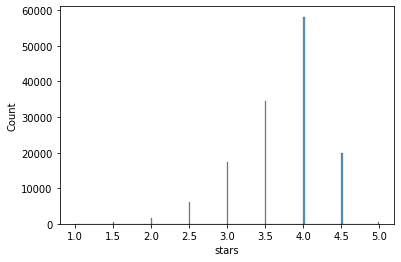

In [312]:
import seaborn as sns
sns.histplot(data=df, x="stars")

<AxesSubplot:xlabel='stars', ylabel='Count'>

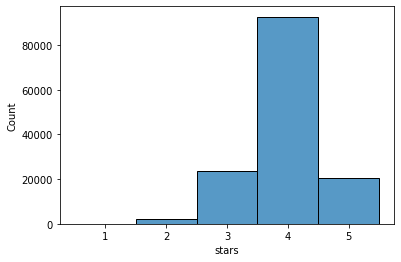

In [313]:
sns.histplot(data=df, x="stars", discrete = True)

[Text(0, 0, '0'), Text(1, 0, '1')]

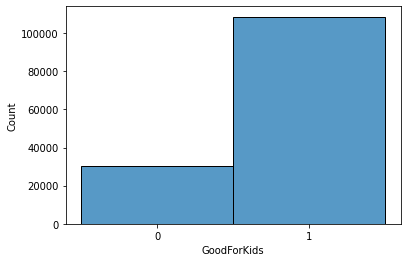

In [315]:
g = sns.histplot(data=df, x="GoodForKids", discrete = True)
g.set_xticks(range(len(df['GoodForKids'].unique())))
g.set_xticklabels(['0','1'])

[Text(0, 0, '0'), Text(1, 0, '1')]

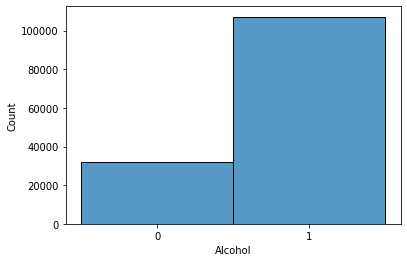

In [317]:
g = sns.histplot(data=df, x="Alcohol", discrete = True)
g.set_xticks(range(len(df['Alcohol'].unique())))
g.set_xticklabels(['0','1'])

[Text(0, 0, '0'), Text(1, 0, '1')]

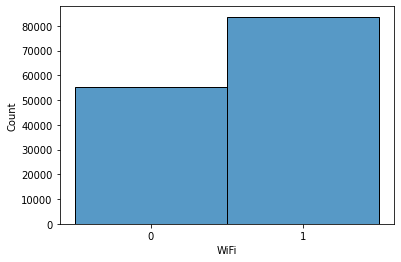

In [318]:
g = sns.histplot(data=df, x="WiFi", discrete = True)
g.set_xticks(range(len(df['WiFi'].unique())))
g.set_xticklabels(['0','1'])

[Text(0, 0, '0'), Text(1, 0, '1')]

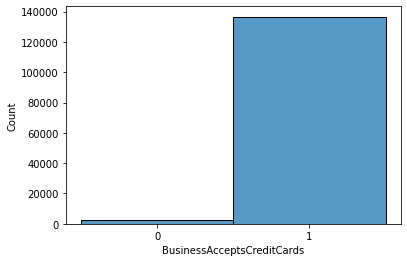

In [319]:
# sns.histplot(data=df, x="BusinessAcceptsCreditCards", discrete = True)
g = sns.histplot(data=df, x="BusinessAcceptsCreditCards", discrete = True)
g.set_xticks(range(len(df['BusinessAcceptsCreditCards'].unique())))
g.set_xticklabels(['0','1'])

<AxesSubplot:xlabel='Restaurant_Price_Range', ylabel='Count'>

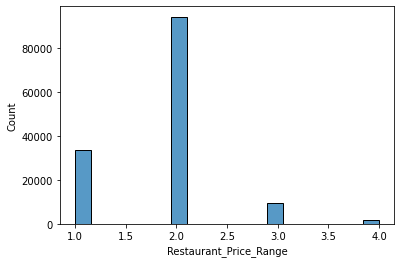

In [320]:
sns.histplot(data=df, x="Restaurant_Price_Range")
# g = sns.histplot(data=df, x="Restaurant_Price_Range", discrete = True)
# g.set_xticks(range(len(df['Restaurant_Price_Range'].unique())))
# g.set_xticklabels(['1','2','3','4'])

[Text(0, 0, '0'), Text(1, 0, '1')]

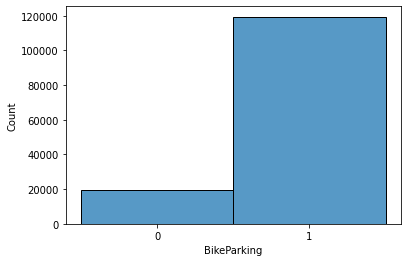

In [321]:
# sns.histplot(data=df, x="BikeParking", discrete = True)
g = sns.histplot(data=df, x="BikeParking", discrete = True)
g.set_xticks(range(len(df['BikeParking'].unique())))
g.set_xticklabels(['0','1'])

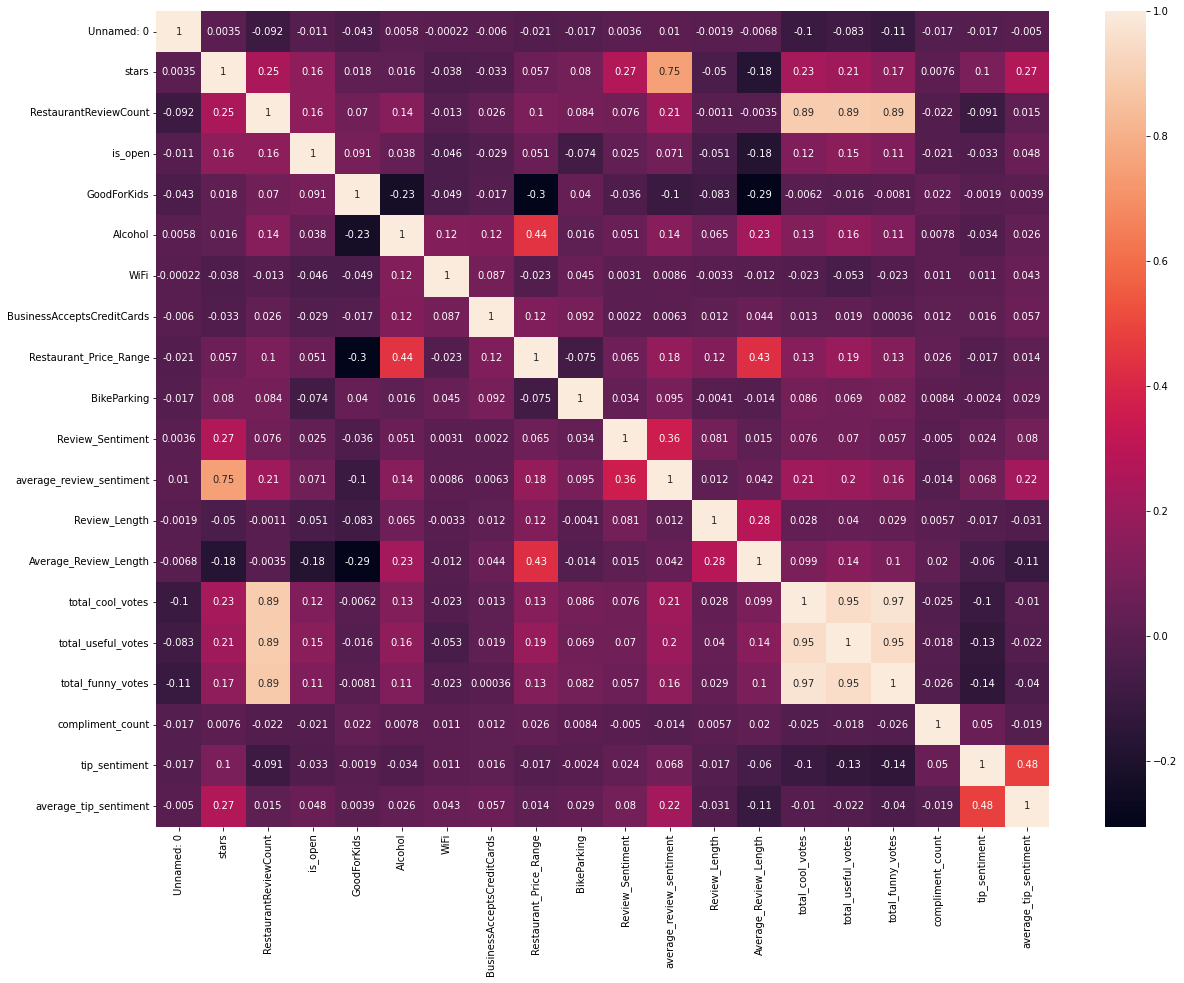

In [322]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplots(figsize=(20,15))
co_mat = df.corr()
sns.heatmap(co_mat, annot=True)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# selectedfeatures = ["RestaurantReviewCount",'is_open','GoodForKids','Alcohol','WiFi','BusinessAcceptsCreditCards','Restaurant_Price_Range','BikeParking','average_review_sentiment','Average_Review_Length','total_cool_votes','total_useful_votes','total_funny_votes','compliment_count','average_tip_sentiment']

In [7]:
selectedfeatures = ["RestaurantReviewCount",'is_open','Restaurant_Price_Range','BikeParking','average_review_sentiment','Average_Review_Length','total_cool_votes','total_useful_votes','total_funny_votes','average_tip_sentiment']

In [8]:
features = dfFinal4[selectedfeatures]

In [9]:
ratings = dfFinal4["stars"]

In [10]:
ratings.value_counts()

4.0    58195
3.5    34542
4.5    19902
3.0    17464
2.5     6145
2.0     1618
1.5      557
5.0      529
1.0       37
Name: stars, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)

In [13]:
features.shape

(138989, 10)

In [14]:
ratings.shape

(138989,)

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [16]:

model.fit(X_train,y_train)

LinearRegression()

In [17]:
model.score(X_train,y_train)

0.6327910023316081

In [18]:
model.score(X_test,y_test)

0.632014340513954

In [21]:
import numpy as np

In [ ]:
#Predicting the restaurants based on attributes

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
sample_restaurant = np.array([86,1,2,1.0,0.690538,485.0,0.0,3.0,4.0,0.349187]).reshape(1,-1)

In [34]:
model.predict(sample_restaurant)

array([3.74898574])

In [35]:
sample_restaurant2 = np.array([800,1,2,1.0,0.990538,485.0,0.0,3.0,4.0,0.349187]).reshape(1,-1)

In [36]:
model.predict(sample_restaurant2)

array([4.42053363])

In [20]:
import pandas as pd
fdf = pd.read_csv("finaldf1_final_final.csv")
data_classes = fdf[(fdf['stars']==1)|(fdf['stars']==2) |(fdf['stars']==3) |(fdf['stars']==4) | (fdf['stars']==5)]
print(data_classes.columns)
data_classes.head()
print(data_classes.shape)
data_classes.head()
data_classes = data_classes.drop_duplicates('review_id',keep='last')
data_classes.head()


Index(['Unnamed: 0', 'business_id', 'name', 'stars', 'RestaurantReviewCount',
       'is_open', 'attributes', 'categories', 'GoodForKids', 'Alcohol', 'WiFi',
       'BusinessAcceptsCreditCards', 'Restaurant_Price_Range', 'BikeParking',
       'review_id', 'user_id_x', 'review_text', 'Review_Sentiment',
       'average_review_sentiment', 'Review_Length', 'Average_Review_Length',
       'total_cool_votes', 'total_useful_votes', 'total_funny_votes',
       'compliment_count', 'tip_sentiment', 'average_tip_sentiment'],
      dtype='object')
(77843, 27)


,Unnamed: 0,business_id,name,stars,RestaurantReviewCount,is_open,attributes,categories,GoodForKids,Alcohol,...,Review_Sentiment,average_review_sentiment,Review_Length,Average_Review_Length,total_cool_votes,total_useful_votes,total_funny_votes,compliment_count,tip_sentiment,average_tip_sentiment
0,0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': ""u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,...,0.9824,0.690538,630.0,485.0,0.0,3.0,4.0,0.011854,0.315884,0.349187
1,1,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': ""u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,...,-0.9368,0.690538,885.0,485.0,0.0,3.0,4.0,0.011854,0.315884,0.349187
2,2,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': ""u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,...,0.8745,0.690538,174.0,485.0,0.0,3.0,4.0,0.011854,0.315884,0.349187
3,3,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': ""u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,...,0.9739,0.690538,553.0,485.0,0.0,3.0,4.0,0.011854,0.315884,0.349187
4,4,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': ""u...","Gastropubs, Food, Beer Gardens, Restaurants, B...",0.0,1.0,...,0.9929,0.690538,841.0,485.0,0.0,3.0,4.0,0.011854,0.315884,0.349187


In [23]:

#Clasififcation Analysis
x = data_classes['review_text']
y = data_classes['stars']
count = data_classes['stars'].value_counts()
print(count)
print(x.head())
print(y.head())

4.0    58195
3.0    17464
2.0     1618
5.0      529
1.0       37
Name: stars, dtype: int64
0    Stopped in on a busy Friday night. Despite the...
1    Went there about 1 PM on a Monday.  It wasn't ...
2    This was the place the be on Friday Night! If ...
3    Went to this place with my family over the wee...
4    Stopped on a midweek afternoon, and so glad th...
Name: review_text, dtype: object
0    4.0
1    4.0
2    4.0
3    4.0
4    4.0
Name: stars, dtype: float64


In [24]:
import string
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
#import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize,StandardScaler
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score 
from sklearn.naive_bayes import MultinomialNB
import html2text
from sklearn.tree import DecisionTreeClassifier #,StandardScaler()

print(x.head())
def clean_data(data):
    #print(data)
    texto = html2text.html2text(data)
    clean_sentence = ''.join([x for x in texto if x in string.ascii_letters + '\'- '])
    #print(clean_sentence)
    return clean_sentence.lower()
    
# Vectorizing
vocab =TfidfVectorizer(analyzer=clean_data,stop_words='english').fit_transform(x.values.astype('U'))  
norm_data = normalize(vocab, norm='l2')


0    Stopped in on a busy Friday night. Despite the...
1    Went there about 1 PM on a Monday.  It wasn't ...
2    This was the place the be on Friday Night! If ...
3    Went to this place with my family over the wee...
4    Stopped on a midweek afternoon, and so glad th...
Name: review_text, dtype: object


In [25]:

x_train,x_test,y_train,y_test = train_test_split(norm_data,y,test_size=0.5)

Accuracy Score: 74.69


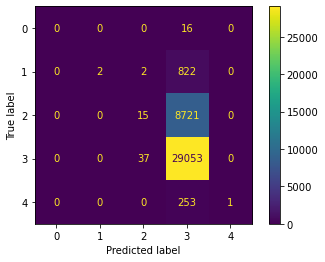

In [26]:
randomforest = RandomForestClassifier()
randomforest_classifier = randomforest.fit(x_train,y_train)
predict_randomforest = randomforest.predict(x_test)
score = round(accuracy_score(y_test,predict_randomforest)*100,2)
print("Accuracy Score:",score)
conmatrix = confusion_matrix(y_test,predict_randomforest)
ConfusionMatrixDisplay(confusion_matrix=conmatrix).plot()

Accuracy Score: 74.74


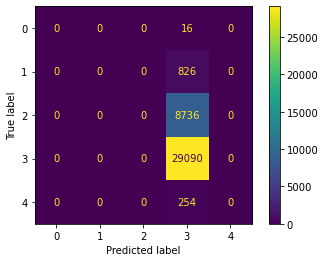

In [27]:
# Multinomial Naive Bayes
NaiveBayes = MultinomialNB()
naive = NaiveBayes.fit(x_train,y_train)
prenaive = NaiveBayes.predict(x_test)
score = round(accuracy_score(y_test,prenaive)*100,2)
print("Accuracy Score:",score)
conmatrix = confusion_matrix(y_test,prenaive)
ConfusionMatrixDisplay(confusion_matrix=conmatrix).plot()

Accuracy Score: 60.29


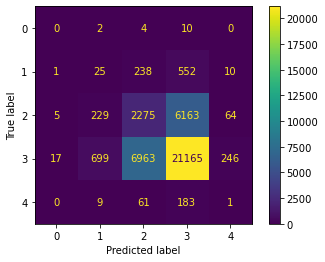

In [28]:

#Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)
score = round(accuracy_score(y_test,y_pred)*100,2)
print("Accuracy Score:",score)
conmatrix = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=conmatrix).plot()

In [31]:
#Measuring accuracy of each model  by randomly selecting a review and applying 
#each model to it
reviewfrommatrix = vocab[0]
print("Rating from dataset: ",data_classes['stars'].values[0])
print("Random forest Predicted stars rating:",randomforest_classifier.predict(reviewfrommatrix)[0])
print("Naive Bayes Predicted stars rating:",naive.predict(reviewfrommatrix)[0])
print("Decision Tree Predicted stars rating:",clf.predict(reviewfrommatrix)[0])

Rating from dataset:  4.0
Random forest Predicted stars rating: 4.0
Naive Bayes Predicted stars rating: 4.0
Decision Tree Predicted stars rating: 4.0
